<h2 style='color:blue' align='center'>Transfer learning in image classification</h2>

**In this notebook we will use transfer learning and take pre-trained model from google's Tensorflow Hub and re-train that on flowers dataset. Using pre-trained model saves lot of time and computational budget for new classification problem at hand**

In [2]:
#using pretrained model to classify flowers. it will reduce time and computation to classify with high accuracy.
# tensorflow hub provides pretrained models already trained with millions of images
# pretrained model gives the weights, change only last few layers for your problem,  

**Transfer learning**: research problem in ML that focuses on storing knowledge gained while solving a problem and applying it to a different but related problem

Example: if you have a trained model on cars you can use it in trucks: they have similar features. 

In [71]:
pip install tensorflow_hub

  Obtaining dependency information for tensorflow_hub from https://files.pythonhosted.org/packages/30/78/9d5292a2b616901bdb075bbf0c777b293f4140bb48108ac2b33fd716c2eb/tensorflow_hub-0.14.0-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/90.3 kB ? eta -:--:--
   ---------------------------------------- 90.3/90.3 kB 2.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [72]:
import tensorflow as tf

In [73]:
import tensorflow_hub as hub # give access to pretrained models

In [74]:
import numpy as np
import matplotlib.pylab as plt

In [76]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [77]:
import cv2
import PIL.Image as Image
import os

**Make predictions using ready made model (without any training)**

In [79]:
# importing Mobilenet V2 classification model
# add 3rd dimension for the rgb channel. it will do (224,224,3)
#with running this code, we have model-like pickled model. 

IMAGE_SHAPE = (224,224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape = IMAGE_SHAPE+(3,) )
])

In [80]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

**classifying a random photo** Cool heah?

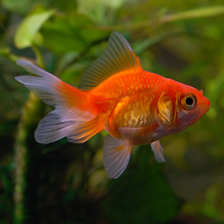

In [93]:
goldfish = Image.open("C:/Users/Owner/goldfish.jpg").resize(IMAGE_SHAPE)
goldfish

In [98]:
np.array(goldfish)

array([[[ 72,  85,  18],
        [ 80,  95,  23],
        [ 89, 107,  30],
        ...,
        [ 84, 100,   1],
        [ 82,  98,   1],
        [ 79,  94,   0]],

       [[ 73,  85,  21],
        [ 83,  97,  28],
        [ 90, 108,  33],
        ...,
        [ 82,  97,   1],
        [ 80,  95,   1],
        [ 77,  92,   0]],

       [[ 73,  85,  22],
        [ 80,  94,  26],
        [ 88, 106,  33],
        ...,
        [ 81,  96,   1],
        [ 79,  94,   2],
        [ 76,  91,   1]],

       ...,

       [[ 14,  28,   4],
        [ 13,  29,   5],
        [ 13,  31,   6],
        ...,
        [ 40,  56,  10],
        [ 40,  57,   9],
        [ 41,  57,   8]],

       [[ 16,  32,   4],
        [ 15,  34,   5],
        [ 14,  35,   5],
        ...,
        [ 35,  52,  12],
        [ 36,  53,  11],
        [ 36,  53,   9]],

       [[ 17,  37,   3],
        [ 18,  39,   5],
        [ 14,  38,   3],
        ...,
        [ 29,  46,  11],
        [ 30,  47,  10],
        [ 30,  48,   9]]

**before classifying**: scale it man!

In [99]:
goldfish = np.array(goldfish)/255
goldfish

array([[[0.28235294, 0.33333333, 0.07058824],
        [0.31372549, 0.37254902, 0.09019608],
        [0.34901961, 0.41960784, 0.11764706],
        ...,
        [0.32941176, 0.39215686, 0.00392157],
        [0.32156863, 0.38431373, 0.00392157],
        [0.30980392, 0.36862745, 0.        ]],

       [[0.28627451, 0.33333333, 0.08235294],
        [0.3254902 , 0.38039216, 0.10980392],
        [0.35294118, 0.42352941, 0.12941176],
        ...,
        [0.32156863, 0.38039216, 0.00392157],
        [0.31372549, 0.37254902, 0.00392157],
        [0.30196078, 0.36078431, 0.        ]],

       [[0.28627451, 0.33333333, 0.08627451],
        [0.31372549, 0.36862745, 0.10196078],
        [0.34509804, 0.41568627, 0.12941176],
        ...,
        [0.31764706, 0.37647059, 0.00392157],
        [0.30980392, 0.36862745, 0.00784314],
        [0.29803922, 0.35686275, 0.00392157]],

       ...,

       [[0.05490196, 0.10980392, 0.01568627],
        [0.05098039, 0.11372549, 0.01960784],
        [0.05098039, 0

In [100]:
goldfish.shape

(224, 224, 3)

In [101]:
goldfish

array([[[0.28235294, 0.33333333, 0.07058824],
        [0.31372549, 0.37254902, 0.09019608],
        [0.34901961, 0.41960784, 0.11764706],
        ...,
        [0.32941176, 0.39215686, 0.00392157],
        [0.32156863, 0.38431373, 0.00392157],
        [0.30980392, 0.36862745, 0.        ]],

       [[0.28627451, 0.33333333, 0.08235294],
        [0.3254902 , 0.38039216, 0.10980392],
        [0.35294118, 0.42352941, 0.12941176],
        ...,
        [0.32156863, 0.38039216, 0.00392157],
        [0.31372549, 0.37254902, 0.00392157],
        [0.30196078, 0.36078431, 0.        ]],

       [[0.28627451, 0.33333333, 0.08627451],
        [0.31372549, 0.36862745, 0.10196078],
        [0.34509804, 0.41568627, 0.12941176],
        ...,
        [0.31764706, 0.37647059, 0.00392157],
        [0.30980392, 0.36862745, 0.00784314],
        [0.29803922, 0.35686275, 0.00392157]],

       ...,

       [[0.05490196, 0.10980392, 0.01568627],
        [0.05098039, 0.11372549, 0.01960784],
        [0.05098039, 0

In [102]:
#prediction accepts muliple input: add 1 more dim

In [104]:
goldfish[np.newaxis].shape

(1, 224, 224, 3)

In [106]:
result = classifier.predict(goldfish[np.newaxis])
# there is 1000 classes: it gives prediction for each class. 

1/1 [==============================] - 0s 185ms/step


In [111]:
result

array([[ 0.2210783 ,  2.0497668 ,  9.622809  , ..., -1.4619297 ,
        -0.28230897, -0.25916293]], dtype=float32)

In [107]:
result.shape

(1, 1001)

In [108]:
#find the max prob to decide category

In [110]:
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [113]:
image_labels = []

with open("C:/Users/Owner/ImageNetLabels.txt", "r") as f:
    image_labels = f.read().splitlines()
    
    
image_labels[:3]

['background', 'tench', 'goldfish']

In [114]:
image_labels[predicted_label_index]

'goldfish'

In [117]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file("flower_photos", origin = dataset_url, cache_dir ="C:/Users/Owner", untar = True)

In [118]:
import pathlib #converts string path into windows path

data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('C:/Users/Owner/datasets/flower_photos')

In [119]:
list(data_dir.glob("*/*.jpg"))[:5]

[WindowsPath('C:/Users/Owner/datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('C:/Users/Owner/datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('C:/Users/Owner/datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('C:/Users/Owner/datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('C:/Users/Owner/datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

In [121]:
image_count = len(list(data_dir.glob("*/*.jpg")))
image_count

3670

In [122]:
roses = list(data_dir.glob("roses/*"))
roses[:5]

[WindowsPath('C:/Users/Owner/datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('C:/Users/Owner/datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('C:/Users/Owner/datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('C:/Users/Owner/datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('C:/Users/Owner/datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

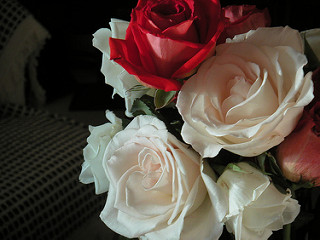

In [123]:
Image.open(str(roses[1]))

In [124]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [125]:
flowers_images_dict["daisy"][0]

WindowsPath('C:/Users/Owner/datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg')

In [126]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [127]:
str(flowers_images_dict["daisy"][0])

'C:\\Users\\Owner\\datasets\\flower_photos\\daisy\\100080576_f52e8ee070_n.jpg'

In [128]:
# we will use cv2 mdule to read image file into opencv object
img = cv2.imread(str(flowers_images_dict["roses"][0])) # opencv expects string path

In [129]:
img.shape

(240, 179, 3)

In [130]:
cv2.resize(img, (IMAGE_SHAPE)).shape

(224, 224, 3)

In [131]:
X, y = [], []

for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,IMAGE_SHAPE)
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [132]:
X[0]

array([[[ 0, 15,  6],
        [ 0, 15,  6],
        [ 0, 16,  7],
        ...,
        [24, 51, 31],
        [25, 52, 32],
        [26, 53, 33]],

       [[ 8, 22, 14],
        [ 8, 22, 14],
        [ 7, 21, 14],
        ...,
        [21, 47, 31],
        [24, 49, 34],
        [25, 51, 35]],

       [[12, 22, 15],
        [12, 22, 15],
        [11, 22, 14],
        ...,
        [21, 43, 31],
        [24, 46, 33],
        [26, 48, 36]],

       ...,

       [[17, 29, 25],
        [14, 25, 20],
        [13, 22, 15],
        ...,
        [ 2, 11,  2],
        [ 0,  7,  1],
        [ 0,  4,  0]],

       [[19, 30, 28],
        [18, 28, 25],
        [16, 25, 19],
        ...,
        [ 2, 10,  2],
        [ 1,  8,  2],
        [ 0,  7,  2]],

       [[ 9, 19, 19],
        [15, 23, 22],
        [19, 27, 24],
        ...,
        [ 1, 11,  2],
        [ 2, 10,  3],
        [ 3, 11,  4]]], dtype=uint8)

In [133]:
X = np.array(X)
y = np.array(y)

In [134]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [135]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [136]:
X_train_scaled[0]

array([[[0.27843137, 0.3254902 , 0.31764706],
        [0.24705882, 0.28235294, 0.2627451 ],
        [0.25490196, 0.27058824, 0.24705882],
        ...,
        [0.18823529, 0.15294118, 0.14117647],
        [0.18823529, 0.15294118, 0.14117647],
        [0.18823529, 0.15294118, 0.14117647]],

       [[0.23137255, 0.25882353, 0.25490196],
        [0.23137255, 0.25490196, 0.23529412],
        [0.25490196, 0.2627451 , 0.23921569],
        ...,
        [0.18823529, 0.15294118, 0.14117647],
        [0.18823529, 0.15294118, 0.14117647],
        [0.19607843, 0.16078431, 0.14901961]],

       [[0.21960784, 0.22352941, 0.21960784],
        [0.23921569, 0.24313725, 0.22745098],
        [0.25098039, 0.25098039, 0.22745098],
        ...,
        [0.18823529, 0.15294118, 0.14117647],
        [0.19215686, 0.15686275, 0.14509804],
        [0.19607843, 0.16470588, 0.15294118]],

       ...,

       [[0.19215686, 0.49803922, 0.37647059],
        [0.14901961, 0.2627451 , 0.19607843],
        [0.20392157, 0

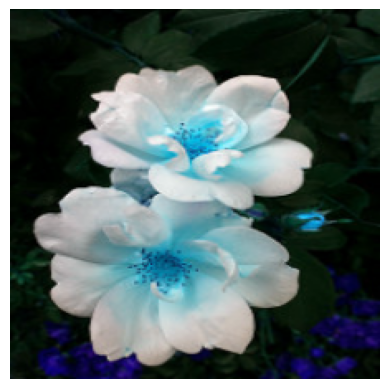

In [138]:
plt.axis("off")
plt.imshow(X[0])

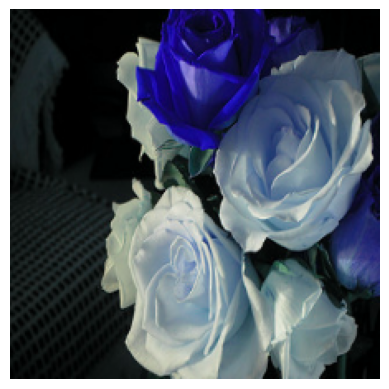

In [146]:
plt.axis("off")
plt.imshow(X[1])

In [141]:
predicted = classifier.predict(np.array([X[0],X[1], X[2]]))

1/1 [==============================] - 0s 310ms/step


In [142]:
predicted = np.argmax(predicted,axis =1)

In [144]:
predicted

array([795, 880, 795], dtype=int64)

In [145]:
image_labels[795]

'shower curtain'

In [147]:
image_labels[880]

'umbrella'

In [ ]:
#so we understand we cannot use ready-made model. because it has only daisy as a flower. 

In [148]:
# we will retrain our flower model

In [150]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
#this will give the exact same pre-trained model except last layer
#trainable: False, because we freeze the layers-except last layer

pretrained_model_without_top_layer = hub.KerasLayer(
feature_extractor_model, input_shape = (224,224,3), trainable=False)

In [152]:
num_of_flowers = 5

model = tf.keras.Sequential([
    pretrained_model_without_top_layer, 
    tf.keras.layers.Dense(num_of_flowers) #we identify last layer here. 
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2264389 (8.64 MB)
Trainable params: 6405 (25.02 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [153]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=1)

86/86 [==============================] - 94s 913ms/step - loss: 0.8493 - acc: 0.6850


In [154]:
#we got train accuracy of 0.68-in data aug it was: .38-.50

In [155]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 53s 1s/step - loss: 0.5414 - acc: 0.8083


[0.5414153933525085, 0.8082788586616516]